In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
results_df = pd.read_csv('../data/results.csv')
results_df.head()

,Model,Prompting,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K
0,Qwen2.5 7B Instruct,Zero-shot,NaN,NaN,20.00,69.0,30.3,18.1
1,Qwen2.5 7B Instruct,CoT,NaN,NaN,23.33,68.0,12.0,6.7
2,Qwen2.5 7B Instruct,CoT+BF,Wait,256.0,20.00,41.2,43.5,24.9
3,Qwen2.5 7B Instruct,CoT+BF,Wait,512.0,6.67,55.8,46.7,26.1
4,Qwen2.5 7B Instruct,CoT+BF,Wait,1024.0,26.67,64.4,50.2,26.3


In [3]:
results_df['Budget'].unique()

array([  nan,  256.,  512., 1024., 2048., 4096., 8192.])

In [4]:
selected_models = ["RFT", "simplescaling/s1.1-7B", "open-thoughts/OpenThinker3-7B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"]
results_df = results_df[results_df['Model'].isin(selected_models)]

results_df = results_df[results_df['Prompting'].isin(["CoT+BF"])]
results_df = results_df[results_df['Keyword'] == "Wait"]

results_df.head()

,Model,Prompting,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K
11,RFT,CoT+BF,Wait,256.0,16.67,41.2,36.9,24.3
12,RFT,CoT+BF,Wait,512.0,16.67,56.4,40.7,27.8
13,RFT,CoT+BF,Wait,1024.0,26.67,63.2,44.9,27.8
14,RFT,CoT+BF,Wait,2048.0,20.00,64.6,46.3,26.8
15,RFT,CoT+BF,Wait,4096.0,16.67,65.2,45.9,27.4


In [6]:
# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'

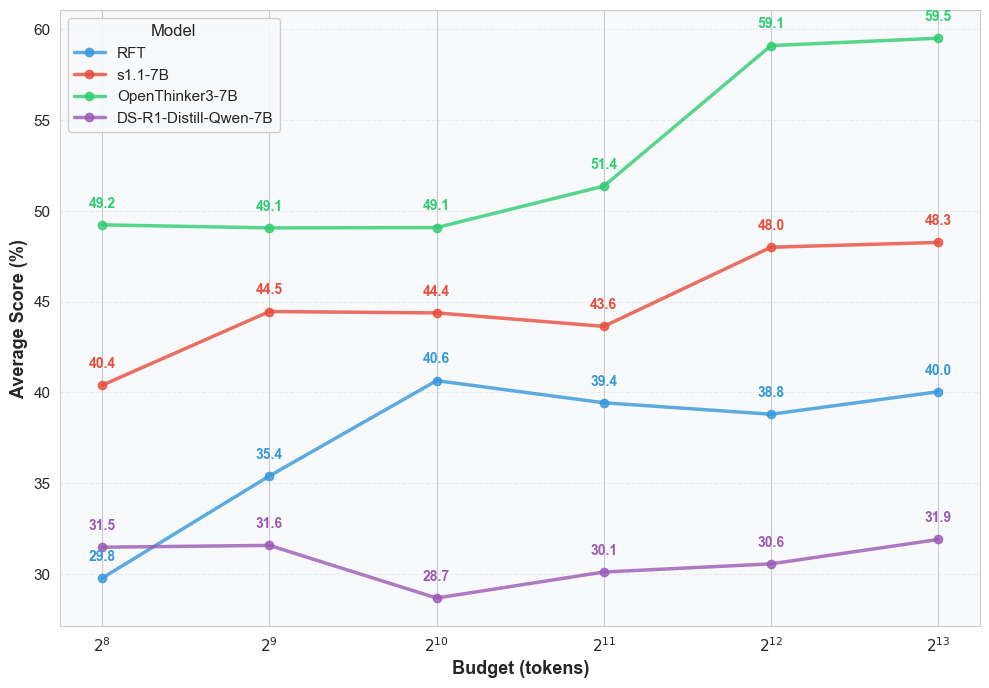

In [15]:
# Compute the Average column (mean of the metric columns for each row, ignoring NAs)
metric_columns = ['AIME 2025', 'MATH500', 'MMLU Pro-1K', 'SuperGPQA-1K']
results_df['Average'] = results_df[metric_columns].mean(axis=1, skipna=True)

# Dictionary mapping original model name to pretty name
pretty_names = {
    'RFT': 'RFT',
    'simplescaling/s1.1-7B': 's1.1-7B',
    'open-thoughts/OpenThinker3-7B': 'OpenThinker3-7B',
    'deepseek-ai/DeepSeek-R1-Distill-Qwen-7B': 'DS-R1-Distill-Qwen-7B'
}
results_df['Model_Pretty'] = results_df['Model'].map(pretty_names)
models_list = results_df['Model'].unique()

# Prepare for improved line plot styling
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#e67e22', '#1abc9c']  # more colors if more models

plt.figure(figsize=(10,7))
for idx, model in enumerate(models_list):
    model_df = results_df[results_df['Model'] == model]
    color = colors[idx % len(colors)]
    pretty_model_name = model_df['Model_Pretty'].iloc[0] if len(model_df) > 0 else model
    plt.plot(
        model_df['Budget'], 
        model_df['Average'], 
        marker='o', 
        label=pretty_model_name,
        color=color,
        linewidth=2.5,
        alpha=0.8
    )
    # Value labels at each point
    for x, y in zip(model_df['Budget'], model_df['Average']):
        plt.text(x, y+0.8, f'{y:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel('Budget (tokens)', fontsize=13, fontweight='bold')
plt.ylabel('Average Score (%)', fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xscale("log", base=2)

# Set xticks at actual budget values, removing nan if present
budget_vals = results_df['Budget'].dropna().sort_values().unique()
plt.xticks(budget_vals, [r'$2^{%d}$' % int(np.log2(x)) if x > 0 and np.log2(x).is_integer() else str(x) for x in budget_vals], rotation=0, fontsize=11)

plt.yticks(fontsize=11)
plt.legend(title='Model', fontsize=11, title_fontsize=12, framealpha=0.92)
plt.tight_layout()
plt.savefig('outputs/fig_3_avg_score_linechart.png', dpi=300, bbox_inches='tight')
plt.show()